In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

$$
\vec x_{n+1} = \vec x_{n} + \delta \vec g \left( \vec x_n + \frac{\delta}{2} g(x_x,t_n) , t_n + \frac{\delta}{2} \right) 
$$

In [6]:
def pendulo_cff(x , t , args=[0,0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1 , gamma
    return np.array([ x[1] , -np.sin(x[0]) - args[2]*x[1] + args[0]*np.cos(args[1]*t)])

def RK2(g,x0,t,args=None):
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        sol[:,i+1] += sol[:,i]
        x_intermedio = sol[:,i] + 0.5*h*g(sol[:,i],t[i] , args)
        sol[:,i+1] += h*g( x_intermedio , t[i]+0.5*h , args)
    return sol

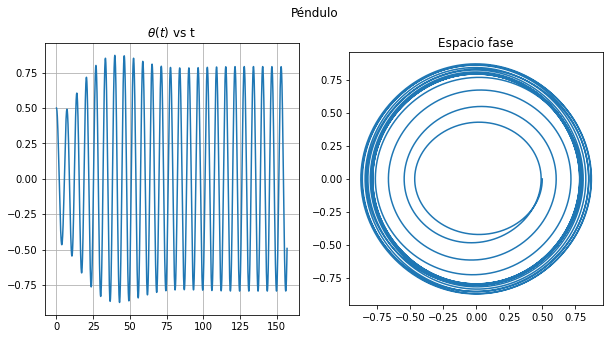

In [10]:
t = np.arange(0,50*np.pi,0.01)
sol = RK2(pendulo_cff,[0.5,0],t,args=[0.1,1,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')